<a href="https://colab.research.google.com/github/DjengoFang/Financial-Engineering-Ruppert-Matteson-/blob/main/Lab5.19.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
import seaborn as sns

In [2]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25609 sha256=f350bdc0eeff7d5b44607ff9821a08b06256e761281e2c4287e8b0ecf306a33e
  Stored in directory: /root/.cache/pip/wheels/8e/6b/cb/628035771acab95dc84f200590b4838c7c3095a70ede67a25a
Successfully built fitter


In [3]:
from fitter import Fitter

In [5]:
url = 'https://raw.githubusercontent.com/DjengoFang/Financial-Engineering-Ruppert-Matteson-/main/datasets/MCD_PriceDaily.csv'
data = pd.read_csv(url)
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1/4/2010,62.63,63.07,62.31,62.78,5839300,53.99
1,1/5/2010,62.66,62.75,62.19,62.30,7099000,53.58
2,1/6/2010,62.20,62.41,61.06,61.45,10551300,52.85
3,1/7/2010,61.25,62.34,61.11,61.90,7517700,53.24
4,1/8/2010,62.27,62.41,61.60,61.84,6107300,53.19


In [6]:
LogRet = np.diff(np.log(data['Adj Close']))
print(LogRet)

[-0.00762298 -0.01371815  0.00735228 ...  0.0036571  -0.00139672
  0.00064488]


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
t,1058.104368,-137.082537,-103.022870,inf,0.021819,0.622082
norm,2564.223910,121.530898,930.875277,inf,0.056501,0.001052


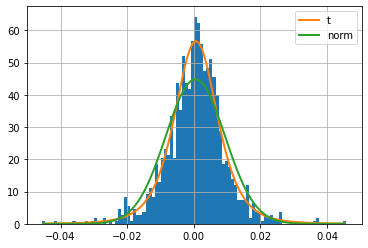

In [13]:
f = Fitter(LogRet, distributions=['t', 'norm'])
f.fit()
f.summary()

In [17]:
f.get_best()

{'t': {'df': 4.276398119468482,
  'loc': 0.0006404879100742888,
  'scale': 0.006637737013387464}}

In [15]:
f.fitted_param['t']

(4.276398119468482, 0.0006404879100742888, 0.006637737013387464)